# Preprocessing: USA Real GDP (Yearly)
This notebook processes GDP data from the World Bank.
**Source:** World Bank CSV
**Target:** Yearly frequency, `timestamp` index, `real_gdp` column.

**Steps:**
1. Load raw data.
2. Transform to time series format.
3. Data cleaning (Null check, Data types).
4. Set Index and Frequency.
5. Save processed dataset.
6. Visualization check.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define file paths (relative to this notebook in preprocessing/ folder)
input_file = '../datasets/wb_usa_real_gdp_raw.csv'
output_file = '../datasets/wb_usa_real_gdp_yearly.csv'

# Ensure output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

In [2]:
# 1. Load Data
# Skip first 4 rows of metadata
df_raw = pd.read_csv(input_file, skiprows=4)

# Filter for USA
usa_data = df_raw[df_raw['Country Code'] == 'USA'].copy()

# Drop metadata columns
cols_to_drop = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
usa_data = usa_data.drop(columns=cols_to_drop)

# 2. Transform to Time Series Format
# Transpose data (rows to columns)
df = usa_data.T
df.reset_index(inplace=True)
df.columns = ['timestamp', 'real_gdp']

print("First 5 rows after transformation:")
print(df.head())

First 5 rows after transformation:
  timestamp      real_gdp
0      1960  3.414530e+12
1      1961  3.493064e+12
2      1962  3.706141e+12
3      1963  3.869211e+12
4      1964  4.093625e+12


In [3]:
# 3. Data Cleaning & Type Conversion

# Convert timestamp to numeric first to handle errors
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)

# Convert integer year to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'].astype(int).astype(str), format='%Y')

# Convert GDP to float
df['real_gdp'] = pd.to_numeric(df['real_gdp'], errors='coerce')

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify Data Types
print("\nData Types:")
print(df.dtypes)


Missing Values:
timestamp    0
real_gdp     0
dtype: int64

Data Types:
timestamp    datetime64[ns]
real_gdp            float64
dtype: object


In [4]:
# 4. Set Index and Frequency

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Set frequency to Year Start (YS)
try:
    df = df.asfreq('YS')
    print("\nFrequency set to 'YS' (Year Start).")
except Exception as e:
    print(f"\nCould not set frequency: {e}")

# Verify Index
print("\nDataFrame Index Info:")
print(df.index)

# Check for gaps
if df.index.freq == 'YS':
    print("Time series is continuous with Yearly Start frequency.")
else:
    print("Warning: Time series frequency could not be strictly enforced.")


Frequency set to 'YS' (Year Start).

DataFrame Index Info:
DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2

Processed data saved to: ../datasets/wb_usa_real_gdp_yearly.csv


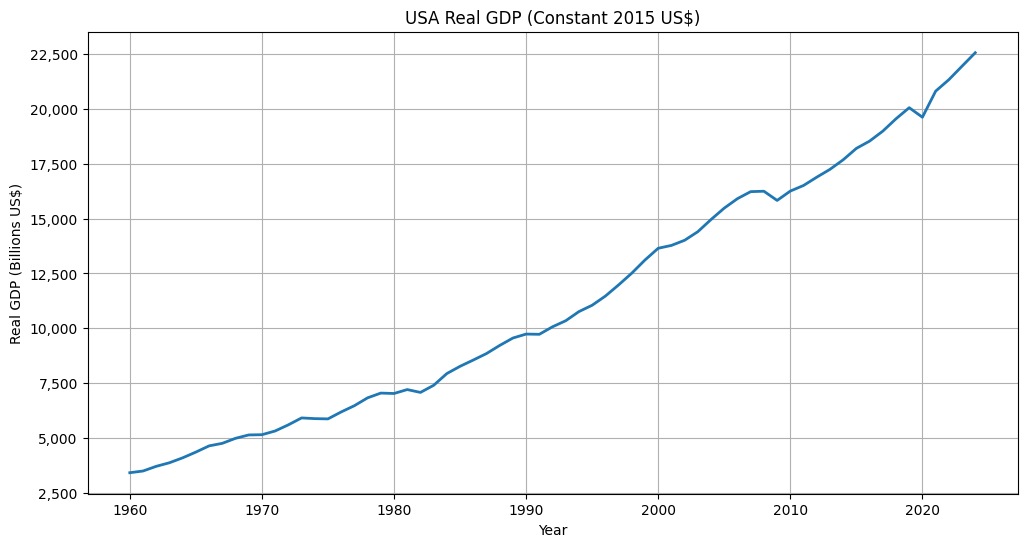

In [5]:
# 5. Save Processed Data
df.to_csv(output_file)
print(f"Processed data saved to: {output_file}")

# 6. Visualization Check
# Scale GDP to Billions for readability
gdp_billions = df['real_gdp'] / 1e9

plt.figure(figsize=(12, 6))
plt.plot(df.index, gdp_billions, linestyle='-', linewidth=2)
plt.title('USA Real GDP (Constant 2015 US$)')
plt.xlabel('Year')
plt.ylabel('Real GDP (Billions US$)')
plt.grid(True)

# Format y-axis
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()